# Importando Bibliotecas

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS 
import nltk
import matplotlib.pyplot as plt
import re
import spacy

# Web Scrapping

In [2]:
page = requests.get("https://www.vagalume.com.br/baco-exu-do-blues/")
soup = BeautifulSoup(page.content, 'html.parser')
lista_alfabetica = BeautifulSoup(str(soup.findChildren(id = "alfabetMusicList")), 'html.parser')
a_tag = lista_alfabetica.findAll('a')
musicas = []
for a in a_tag:
    nome_musica = a.text
    if not(nome_musica == 'TRADUÇÃO' or nome_musica == ''):
        link_musica = a['href']
        musicas.append([nome_musica, link_musica])
for i in range(len(musicas)):
    link = "https://www.vagalume.com.br" + str(musicas[i][1])
    page = requests.get(link)
    soup = BeautifulSoup(page.content, 'html.parser')
    h3_tag = soup.findAll('h3')
    if len(h3_tag) != 0:
        album = h3_tag[0].text
    else:
        album = ''
    lyrics = soup.findChildren(id = 'lyrics')
    lyrics = str(lyrics[0])
    lyrics = lyrics.replace('<div id="lyrics">', '')
    lyrics = lyrics.replace('<div data-plugin="googleTranslate" id="lyrics">', '')
    lyrics = lyrics.replace('<br/>', ' ')
    lyrics = lyrics.replace("\'","'") 
    lyrics = lyrics.replace('</div>', '')
    musicas[i].append(album)
    musicas[i].append(lyrics)
musicas = pd.DataFrame(musicas, columns=['Nome da Música', 'link', 'album', 'letra'])

# Limpeza

In [3]:
letras_combinadas = ' '.join(musicas['letra']).lower()

spc_pt = spacy.load('pt_core_news_sm')

def limpar_texto(texto):

  # Remover caracteres que não são letras 
    letras =  re.findall(r'\b[A-zÀ-úü]+\b', texto.lower())

    #Remover stopwords
    stopwords = nltk.corpus.stopwords.words('portuguese')
    stopwords.append("'")
    stopwords.append("pra")
    stopwords.append("tá")
    stop = set(stopwords)

    meaningful_words = [w for w in letras if w not in stopwords]
    meaningful_words_string = " ".join(meaningful_words)

    #Instanciando o objeto spacy
    spc_letras =  spc_pt(meaningful_words_string)

    #Lemmização e Tokenização
    tokens = [token.lemma_ if token.pos_ == 'VERB' else str(token) for token in spc_letras]

    #problemas com verbo ir
    ir = ['vou', 'vais', 'vai', 'vamos', 'ides', 'vão']
    tokens = ['ir' if token in ir else str(token) for token in tokens]

    return tokens

palavras_artista = limpar_texto(letras_combinadas)

# Frequency Plot

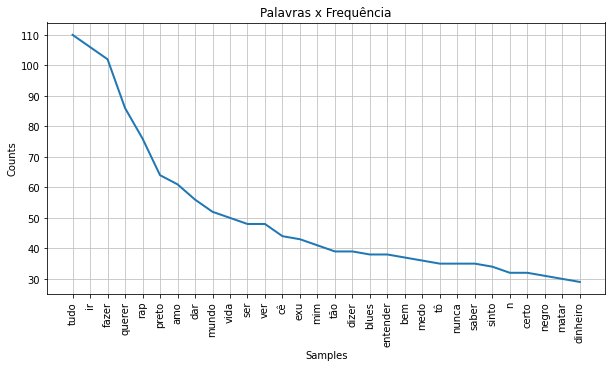

In [4]:
plt.figure(figsize=(10,5))
fd = nltk.FreqDist(palavras_artista)
fd.plot(30,title = "Palavras x Frequência",cumulative=False)

# Wordcloud

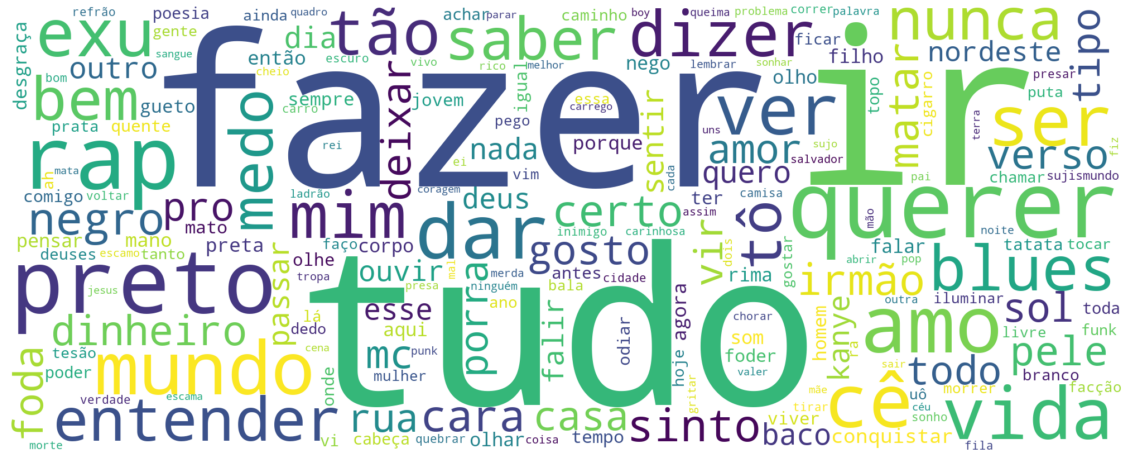

In [5]:
text = " ".join(palavras_artista)
wordcloud = WordCloud(background_color="white",width=2000, height=800, collocations = False).generate(text)
fig = plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
fig.savefig('baco_exu_blues.png', dpi=fig.dpi)
plt.show()

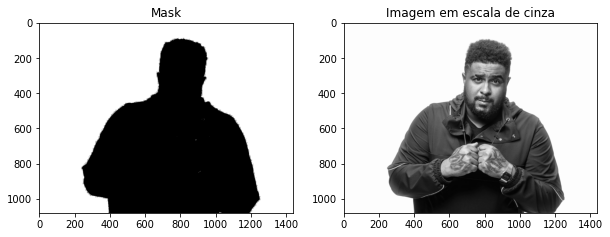

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

imagem = cv2.imread("baco_do_exu_do_blues.jpg")
gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
ret,mask = cv2.threshold(gray,250,255,cv2.THRESH_BINARY)

fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].imshow(mask, cmap="gray")
ax[1].set_title("Imagem em escala de cinza")
ax[1].imshow(gray, cmap="gray")
ax[0].set_title("Mask")
plt.show()

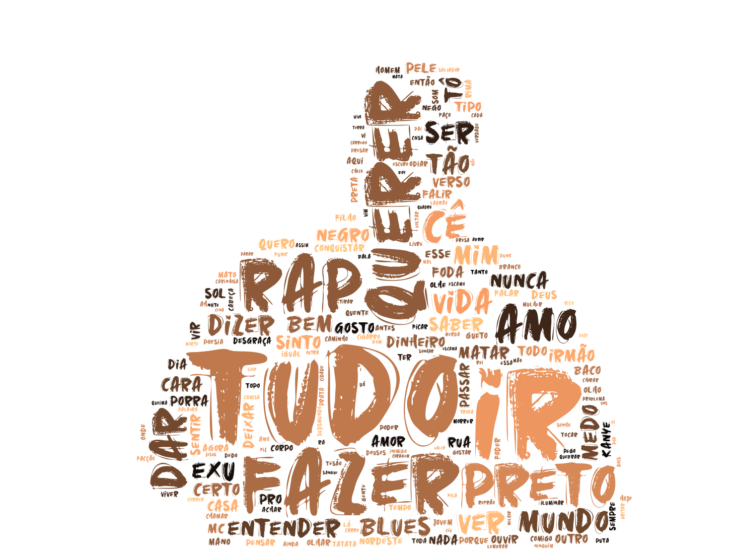

In [7]:
font_path = "/home/luisa/fonts/GoldUnderTheMud-Regular.ttf"
text = " ".join(palavras_artista)
wordcloud = WordCloud(background_color="white",width=2000, height=800, font_path=font_path, mask=mask, colormap="copper", collocations = False).generate(text)
fig = plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
fig.savefig('baco_exu_blues.png', dpi=fig.dpi)
plt.show()

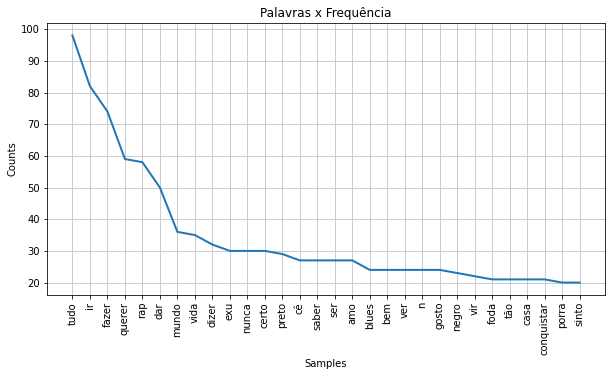

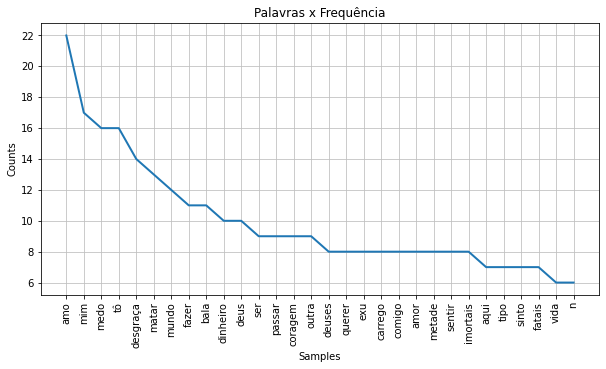

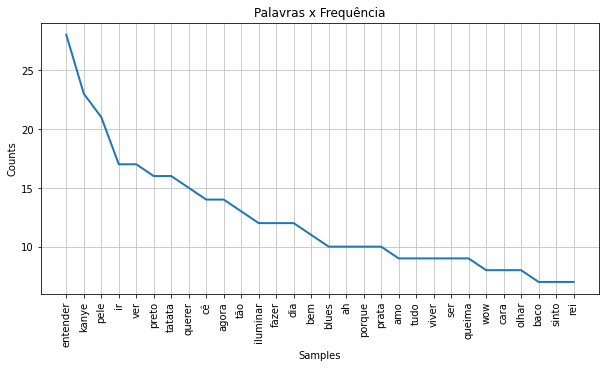

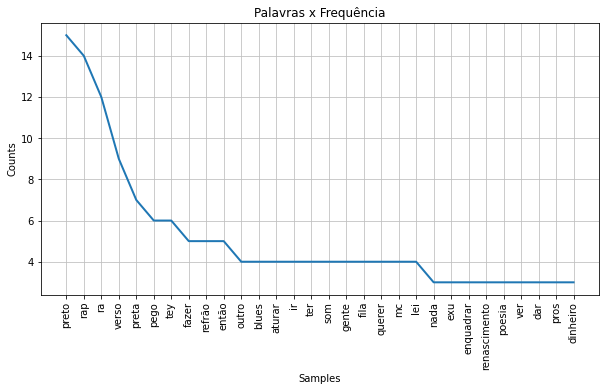

In [9]:
albuns = musicas['album'].unique()
def frequency_plot(album):
    musicas_do_album = musicas[musicas['album'] == album]['letra']
    letras_combinadas = ' '.join(musicas_do_album).lower()
    palavras_album = limpar_texto(letras_combinadas)
    plt.figure(figsize=(10,5))
    fd = nltk.FreqDist(palavras_album)
    fd.plot(30,title = "Palavras x Frequência",cumulative=False)
# turn interactive on
plt.ion()
# your code :
for album in albuns:
    frequency_plot(album)
# turn interactive off
plt.ioff()
plt.show()


# Concordância e similaridade

In [11]:
musicas_text = nltk.Text(palavras_artista)
musicas_text.concordance('mulher')

Displaying 12 of 12 matches:
ode cigarro fode rap fode vida fode mulher fode faço sadboys entrar depressão 
adboys entrar depressão falar lugar mulher cozinha uns coleguinhas cozinhar cr
rico cd ano tão cobrar tô trabalhar mulher brigar amor amo nome deus erra tant
ew quero vida acordar ressacar lado mulher vida mulher vida rá cê conceito boy
a acordar ressacar lado mulher vida mulher vida rá cê conceito boy panos caro 
 punk rap funk quiser rapeize homem mulher fazer querer fazer querer fazer que
 punk rap funk quiser rapeize homem mulher fazer querer fazer querer fazer que
 outra cerveja gelar tô sorrir tudo mulher amar sol nascer ilumina estrada vej
 nada ser humano contentar nada ter mulher perfeita sonhar outra pelar sonhar 
o tons marrom sons amor sobre mesma mulher mudo sabor batom calor gali playboy
te diferente atualmente dizer droga mulher quero foda fazer bodas esposa fé lu
a perco trono preta perco sono oral mulher oração quebrar outro colchão foda t


In [13]:
musicas_text.concordance('dinheiro')

Displaying 25 of 29 matches:
 tantas taças onde pôr vinho fazer dinheiro fazer amor tão bem bem bem bem bem
amor tão bem bem bem bem bem fazer dinheiro fazer amor tão bem bem bem bem bem
juntando grana anestesiar dor toco dinheiro sujo tinta mudar cor cês continuar
coragem erê carrego comigo coragem dinheiro bala palavras pedro bala palavras 
 pedro bala carrego comigo coragem dinheiro bala palavras pedro bala palavra p
 pedro bala carrego comigo coragem dinheiro bala palavras pedro bala palavra p
 pedro bala carrego comigo coragem dinheiro bala dinheiro bala macu macu macu 
rrego comigo coragem dinheiro bala dinheiro bala macu macu macu macu macunaima
res odiar pretos odiar gueto matar dinheiro caos vilão homens mulheres livres 
çar bunda morar quero alugar fazer dinheiro dízimo inimigos dizimo foder assal
to então problemas crime compensar dinheiro valer pena cadeia bosta dinheiro v
r dinheiro valer pena cadeia bosta dinheiro valer pena santa ceia fiéis menino
mato família psicopata 

In [12]:
musicas_text.similar('dinheiro')

querer chinaski alice


In [14]:
musicas_text.similar('mulher')

cigarro rap vida loka duro
